# Pandas_Introduction7
Im creating these series for people that have beginner/intermediate knowledge about pandas library.I m going to share my working notes(after tidying) to pass the info, nothing more. Certain codeblocks could get repetitive. Some info looks contradictory even though i have tried to remove most of them. Sorry for it beforehand. Also goodluck on your learning journey. This is my first kernel as well. Wish me luck. Contact me for any question, i will help you out if i can.

Contents:
* [Dataset](#1)
* [Way To Use Groupby on Pandas DataFrame](#2)
* [Append/Concat, Merge/Join, Pivot/PivotTable/CrossTab, Stack/Unstack](#3)
* [From DataFrame to Panel Data](#4)
* [Outliers in DataFrame](#5)
* [Df["row_filter_criteria"] vs Df.loc["row_filter_criteria", :] (For Filtering)](#6)
* [Value Counts, Value Counts(Normalized), Row and ColSums](#7)
* [Converting Non-Numerical Data to Numerical Data](#8)
* [Vlookup in Excel vs Pandas](#9)
* [Create DataFrame for Mapping and Merge it for Mapped Results](#10)
* [Remove Rows From DataFrame](#11)
* [Create "Year-Month" Column from DateTime Data Type](#12)




<a id="1"></a> 
## Dataset

In [1]:
import pandas as pd
drinks = pd.read_csv('../input/drinks.csv')
movies = pd.read_csv('../input/imdb_1000.csv')
train = pd.read_csv('../input/titanic_train.csv')
ufo = pd.read_csv('../input/ufo.csv', parse_dates=['Time'])

In [2]:
#WAY TO USE GROUPBY ON PANDAS DATAFRAME


<a id="2"></a> 
## Way To Use Groupby on Pandas DataFrame

In [3]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [4]:
#when to use groupby?- when u want to use a statement along this line 
#"for each X i want to know y"
#for each A,B i want to know y,z
drinks.groupby("continent").beer_servings.mean()

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

In [5]:
#now u get multiple cols.
drinks.groupby("continent").max()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,,
Africa,Zimbabwe,376,152,233,9.1
Asia,Yemen,247,326,123,11.5
Europe,United Kingdom,361,373,370,14.4
North America,USA,285,438,100,11.9
Oceania,Vanuatu,306,254,212,10.4
South America,Venezuela,333,302,221,8.3


In [6]:
#pivot f() ll be described later.

<a id="3"></a> 
## Append/Concat, Merge/Join, Pivot/PivotTable/CrossTab, Stack/Unstack

In [7]:
#concat is top lvl method->pd.concat
#append is df method. df.append
#concat has more general method,has more capabilities.append is more narrow,and most of the time we use concat.
#concat used for cbind and rbind(columnbind and rowbind)

In [8]:
#merge is top level f()
#join is just a df method(not sure) df.join
#merge is more general f() has more capabilities. using merge is recommended. always used merge by myself

In [9]:
#pivot table is the most general (not totally sure)
#learn p.table.p.table has all capabilities, so u accomplish nearly all(maybe all)things


In [10]:
#by default this ex is unstacked.It has single index not a multi index.However using unstack turns multi index to index
#using stack turns single index to multi index. multiIndex=stacked, so u can use unstack. SingleIndex=unstacked so u can use stack
drinks.groupby("continent").beer_servings.describe()

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
Africa,53.0,61.471698,80.557816,0.0,15.00,32.0,76.00,376.0
Asia,44.0,37.045455,49.469725,0.0,4.25,17.5,60.50,247.0
Europe,45.0,193.777778,99.631569,0.0,127.00,219.0,270.00,361.0
North America,23.0,145.434783,79.621163,1.0,80.00,143.0,198.00,285.0
Oceania,16.0,89.687500,96.641412,0.0,21.00,52.5,125.75,306.0
South America,12.0,175.083333,65.242845,93.0,129.50,162.5,198.00,333.0


In [11]:
#unstack=multi index to index. Multi index also known as hiearchical index.default is unstack.
drinks.groupby("continent").beer_servings.describe().stack()

continent           
Africa         count     53.000000
               mean      61.471698
               std       80.557816
               min        0.000000
               25%       15.000000
               50%       32.000000
               75%       76.000000
               max      376.000000
Asia           count     44.000000
               mean      37.045455
               std       49.469725
               min        0.000000
               25%        4.250000
               50%       17.500000
               75%       60.500000
               max      247.000000
Europe         count     45.000000
               mean     193.777778
               std       99.631569
               min        0.000000
               25%      127.000000
               50%      219.000000
               75%      270.000000
               max      361.000000
North America  count     23.000000
               mean     145.434783
               std       79.621163
               min        1.000000

In [12]:
#return to default.
drinks.groupby("continent").beer_servings.describe().stack().unstack()

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
Africa,53.0,61.471698,80.557816,0.0,15.00,32.0,76.00,376.0
Asia,44.0,37.045455,49.469725,0.0,4.25,17.5,60.50,247.0
Europe,45.0,193.777778,99.631569,0.0,127.00,219.0,270.00,361.0
North America,23.0,145.434783,79.621163,1.0,80.00,143.0,198.00,285.0
Oceania,16.0,89.687500,96.641412,0.0,21.00,52.5,125.75,306.0
South America,12.0,175.083333,65.242845,93.0,129.50,162.5,198.00,333.0


<a id="4"></a> 
## From DataFrame to Panel Data

In [13]:
df=pd.DataFrame({"name":["A","A","B","B"],"day":[1,2,1,2],"weight":[100,103,130,129],"height":[67,68,72,72]})
df
#2 dudes 2 day with their weight and height.

,name,day,weight,height
0,A,1,100,67
1,A,2,103,68
2,B,1,130,72
3,B,2,129,72


In [14]:
#lets create multiIndex first.using hiearchical index to make yr data make more sense when some sees it.
df.set_index(["name","day"])

weight  height
name day                
A    1       100      67
     2       103      68
B    1       130      72
     2       129      72

In [15]:
#if we want to change it to panel data.(panel is deprecated,and ll be removed later.so u shouldnt use it)
df.set_index(["name","day"]).to_panel()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  


<class 'pandas.core.panel.Panel'>
Dimensions: 2 (items) x 2 (major_axis) x 2 (minor_axis)
Items axis: weight to height
Major_axis axis: A to B
Minor_axis axis: 1 to 2

In [16]:
#turning from panel data to df again.so learning panel is not, necessary just use hierarchical index with df its same
df.set_index(["name","day"]).to_panel().to_frame()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  


weight  height
name day                
A    1       100      67
     2       103      68
B    1       130      72
     2       129      72

<a id="5"></a> 
## Outliers in DataFrame

In [17]:
#what counts as an outlier, u need to have statistical method to filter data from outliers.its not sth static.

In [18]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


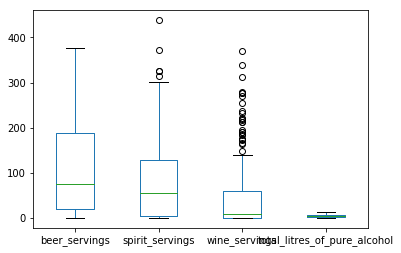

In [19]:
%matplotlib inline
drinks.plot(kind="box")
#to identify outliers u can use ml approach or explore data and set some rules about outliers

<a id="6"></a> 
## Df["row_filter_criteria"] vs Df.loc["row_filter_criteria", :] (For Filtering)

In [20]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [21]:
#df[row_filter_criteria] scenario
movies[movies.duration>=200].head()

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."


In [22]:
#df.loc["row_f_criteria",:] scenario.Whats the difference?
movies.loc[movies.duration>=200,:].head()

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."


In [23]:
#people mostly use the first one so u need to know that code.but also loc is much powerful so people should use it.nonetheless
#its very good idea to know both so u understand the code when u read it.

In [24]:
#hint:both have same output but 1st one could create some troubles in different scenarios however 2nd is bulletproof,use 2nd
movies[movies.duration>=200].genre.head()
movies.loc[movies.duration>=200,"genre"].head()

2         Crime
7     Adventure
17        Drama
78        Crime
85    Adventure
Name: genre, dtype: object

In [25]:
#learning different languages,dif syntax.Nothing more.Maybe one has some dif capabilities that others dont have in some
#scenarios

<a id="7"></a> 
## Value Counts, Value Counts(Normalized), Row and ColSums

In [26]:
#get value counts
drinks.continent.value_counts()

Africa           53
Europe           45
Asia             44
North America    23
Oceania          16
South America    12
Name: continent, dtype: int64

In [27]:
#normalized version-percentage based
drinks.continent.value_counts(normalize=True)

Africa           0.274611
Europe           0.233161
Asia             0.227979
North America    0.119171
Oceania          0.082902
South America    0.062176
Name: continent, dtype: float64

In [28]:
#row,column and grandtotals.Lets do row and column sum.This is colsum
drinks.sum(axis=0)

country                         AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...
beer_servings                                                               20489
spirit_servings                                                             15632
wine_servings                                                                9544
total_litres_of_pure_alcohol                                                910.4
continent                       AsiaEuropeAfricaEuropeAfricaNorth AmericaSouth...
dtype: object

In [29]:
#This is rowsum.but as far as i know u cant get them on same df.Use Excel then import it if to python if necessary
drinks.sum(axis=1)

0        0.0
1      279.9
2       39.7
3      707.4
4      324.9
5      279.9
6      447.3
7      214.8
8      555.4
9      554.7
10      73.3
11     355.3
12     114.0
13       0.0
14     358.3
15     571.4
16     601.5
17     391.8
18      52.1
19      23.4
20     219.8
21     261.6
22     248.4
23     413.2
24      34.6
25     587.3
26      43.3
27      94.3
28      49.0
29     220.0
       ...  
163    318.6
164     98.7
165    405.2
166    575.2
167     57.0
168     17.3
169    364.4
170    222.9
171      6.1
172     58.3
173     63.1
174    366.4
175     75.3
176     81.4
177    124.2
178     57.0
179     62.3
180    496.9
181    158.8
182    550.4
183     48.7
184    499.7
185    376.6
186    136.4
187     50.9
188    443.7
189    116.0
190      6.1
191     57.5
192     90.7
Length: 193, dtype: float64

In [30]:
#u can use concat to put value_counts and value_counts(normalize=True)
a=drinks.continent.value_counts()
b=drinks.continent.value_counts(normalize=True)
pd.concat([a,b],axis=1)
#axis=0 stacks them, if that is what u want.

,continent,continent
Africa,53,0.274611
Europe,45,0.233161
Asia,44,0.227979
North America,23,0.119171
Oceania,16,0.082902
South America,12,0.062176


<a id="8"></a> 
## Converting Non-Numerical Data to Numerical Data

In [31]:
#Converting non numerical data to numerical one for ml purposes(machine learning)

In [32]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [33]:
#we created a str for test purposes.
drinks["beer"]=drinks.beer_servings.astype(str)
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
beer                             object
dtype: object

In [34]:
#this is for 1 col,lets learn multi col
drinks.beer.astype(float)

0        0.0
1       89.0
2       25.0
3      245.0
4      217.0
5      102.0
6      193.0
7       21.0
8      261.0
9      279.0
10      21.0
11     122.0
12      42.0
13       0.0
14     143.0
15     142.0
16     295.0
17     263.0
18      34.0
19      23.0
20     167.0
21      76.0
22     173.0
23     245.0
24      31.0
25     231.0
26      25.0
27      88.0
28      37.0
29     144.0
       ...  
163    128.0
164     90.0
165    152.0
166    185.0
167      5.0
168      2.0
169     99.0
170    106.0
171      1.0
172     36.0
173     36.0
174    197.0
175     51.0
176     51.0
177     19.0
178      6.0
179     45.0
180    206.0
181     16.0
182    219.0
183     36.0
184    249.0
185    115.0
186     25.0
187     21.0
188    333.0
189    111.0
190      6.0
191     32.0
192     64.0
Name: beer, Length: 193, dtype: float64

In [35]:
#if u have multiple catg data, u could turn them into usage in ml model, i recommend using dummy variable.

<a id="9"></a> 
## Vlookup in Excel vs Pandas

In [36]:
#check excel vlookup first-recommended.
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [37]:
movies.content_rating.value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
NC-17          7
PASSED         7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

In [38]:
mapping={"R":"no","PG-13":"yes","PG":"yes"}

In [39]:
#this is what vlookup does in excel.I didnt specify all the value on the content_rating col so some of them is nan.
movies.content_rating.map(mapping)

0       no
1       no
2       no
3      yes
4       no
5      NaN
6      NaN
7      yes
8       no
9       no
10     yes
11     yes
12     yes
13     yes
14     yes
15     yes
16      no
17     NaN
18      no
19     yes
20      no
21      no
22     NaN
23      no
24      no
25     yes
26     yes
27      no
28      no
29     NaN
      ... 
949    yes
950     no
951     no
952     no
953    yes
954    yes
955     no
956    yes
957     no
958    yes
959     no
960    yes
961     no
962    yes
963     no
964    yes
965    yes
966    yes
967     no
968     no
969     no
970     no
971     no
972    NaN
973    yes
974    yes
975    yes
976    yes
977    yes
978     no
Name: content_rating, Length: 979, dtype: object

<a id="10"></a> 
## Create DataFrame for Mapping and Merge it for Mapped Results

In [40]:
#CREATING MY OWN DF FOR MAPPING THEN CREATE A NEW COL IN MAPPED DF FOR MAPPING RESULTS.
mapping2=pd.DataFrame({"ratings":["R","PG-13"],"kids":["no","yes"]})
mapping2

,ratings,kids
0,R,no
1,PG-13,yes


In [41]:
#this ll help you out.
pd.merge(movies,mapping2,left_on="content_rating",right_on="ratings")

,star_rating,title,content_rating,genre,duration,actors_list,ratings,kids
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...",R,no
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']",R,no
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv...",R,no
3,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L....",R,no
4,8.9,Schindler's List,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings...",R,no
5,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh...",R,no
6,8.7,One Flew Over the Cuckoo's Nest,R,Drama,133,"[u'Jack Nicholson', u'Louise Fletcher', u'Mich...",R,no
7,8.7,Goodfellas,R,Biography,146,"[u'Robert De Niro', u'Ray Liotta', u'Joe Pesci']",R,no
8,8.7,The Matrix,R,Action,136,"[u'Keanu Reeves', u'Laurence Fishburne', u'Car...",R,no
9,8.7,City of God,R,Crime,130,"[u'Alexandre Rodrigues', u'Matheus Nachtergael...",R,no


<a id="11"></a> 
## Remove Rows From DataFrame

In [42]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00


In [43]:
ufo.shape

(18241, 5)

In [44]:
#thats all.
ufo.iloc[:-30,:]

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00
5,Valley City,NaN,DISK,ND,1934-09-15 15:30:00
6,Crater Lake,NaN,CIRCLE,CA,1935-06-15 00:00:00
7,Alma,NaN,DISK,MI,1936-07-15 00:00:00
8,Eklutna,NaN,CIGAR,AK,1936-10-15 17:00:00
9,Hubbard,NaN,CYLINDER,OR,1937-06-15 00:00:00


In [45]:
ufo.iloc[:-30,:].shape

(18211, 5)

In [46]:
#u can create yr own data and work around it to learn slicing
x=list(range(100))
print(x)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


In [47]:
print(x[:-30])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69]


<a id="12"></a> 
## Create "Year-Month" Column from DateTime Data Type

In [48]:
#CREATING A COL FOR YEAR/MONTH FROM THE DATETIME COL/DATETIME OBJECT

In [49]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00


In [50]:
ufo.dtypes

City                       object
Colors Reported            object
Shape Reported             object
State                      object
Time               datetime64[ns]
dtype: object

In [51]:
#time is datetime dtypes lets convert it to str
ufo["year"]=ufo.Time.dt.year.astype(str)

In [52]:
ufo["month"]=ufo.Time.dt.month.astype(str)

In [53]:
#this could work.if u want to make your result as 1930-06 then its little bit longer
ufo.year.str.cat(ufo.month,sep="-")

0         1930-6
1         1930-6
2         1931-2
3         1931-6
4         1933-4
5         1934-9
6         1935-6
7         1936-7
8        1936-10
9         1937-6
10        1937-8
11        1939-6
12        1939-6
13        1939-7
14        1941-6
15        1941-7
16        1942-2
17        1942-6
18        1942-7
19        1943-4
20        1943-6
21        1943-8
22        1943-8
23       1943-10
24        1944-1
25        1944-1
26        1944-1
27        1944-4
28        1944-6
29        1944-6
          ...   
18211    2000-12
18212    2000-12
18213    2000-12
18214    2000-12
18215    2000-12
18216    2000-12
18217    2000-12
18218    2000-12
18219    2000-12
18220    2000-12
18221    2000-12
18222    2000-12
18223    2000-12
18224    2000-12
18225    2000-12
18226    2000-12
18227    2000-12
18228    2000-12
18229    2000-12
18230    2000-12
18231    2000-12
18232    2000-12
18233    2000-12
18234    2000-12
18235    2000-12
18236    2000-12
18237    2000-12
18238    2000-

In [54]:
#turn data into str so u can use string methods (str.pad)
ufo["month"]=ufo.Time.dt.month.astype(str).str.pad(width=2,fillchar="0")
ufo.year.str.cat(ufo.month,sep="-")

0        1930-06
1        1930-06
2        1931-02
3        1931-06
4        1933-04
5        1934-09
6        1935-06
7        1936-07
8        1936-10
9        1937-06
10       1937-08
11       1939-06
12       1939-06
13       1939-07
14       1941-06
15       1941-07
16       1942-02
17       1942-06
18       1942-07
19       1943-04
20       1943-06
21       1943-08
22       1943-08
23       1943-10
24       1944-01
25       1944-01
26       1944-01
27       1944-04
28       1944-06
29       1944-06
          ...   
18211    2000-12
18212    2000-12
18213    2000-12
18214    2000-12
18215    2000-12
18216    2000-12
18217    2000-12
18218    2000-12
18219    2000-12
18220    2000-12
18221    2000-12
18222    2000-12
18223    2000-12
18224    2000-12
18225    2000-12
18226    2000-12
18227    2000-12
18228    2000-12
18229    2000-12
18230    2000-12
18231    2000-12
18232    2000-12
18233    2000-12
18234    2000-12
18235    2000-12
18236    2000-12
18237    2000-12
18238    2000-